In [3]:
## MP 6 pr. 4a) 
import numpy as np

A = np.array([[2.3346, 1.1384, 2.5606, 1.4507], [1.1384, 0.7860, 1.2743, 0.9531], 
              [2.5606, 1.2743, 2.8147, 1.6487], [1.4507, 0.9531, 1.6487, 1.8123]]) + 5*np.eye(4)

b = np.array([0.4218, 0.9157, 0.7922, 0.9595])

def jacobi(A, b, K):
    m = A.shape[0]
    D = np.diag(np.diag(A))
    A1 = A - D
    x = np.zeros(m)
    D_inv = np.linalg.inv(D)
    I = np.eye(m)
    for i in range(K):
        x = np.matmul(D_inv, b) + np.matmul(I - np.matmul(D_inv, A), x)
    return x

print(jacobi(A, b, 45))
print(np.linalg.solve(A, b))

[-0.00461723  0.12814403  0.058855    0.10965899]
[-0.00461723  0.12814403  0.058855    0.10965899]


In [4]:
def Gauss_Seidel(A, b, K):
    m = A.shape[0]
    N = np.tril(A)
    P = np.triu(A, k = 1)
    x = np.zeros(m)
    for i in range(K):
        #x = np.matmul(np.linalg.inv(N), (b - np.matmul(P, x)))
        x = np.linalg.solve(N, b - np.matmul(P, x))  
    return x

x = Gauss_Seidel(A, b , 13)

print(np.linalg.solve(A, b))
print(x)

[-0.00461723  0.12814403  0.058855    0.10965899]
[-0.00461723  0.12814403  0.058855    0.10965899]


In [5]:
def SOM(A, b, K, w):
    m = A.shape[0]
    P = np.triu(A, k=1)
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    x = np.zeros(m)
    boo = np.linalg.inv(D + w*L)
    for i in range(K):
        x = np.matmul(boo, np.matmul((1-w)*D - w*P, x)) + np.matmul(boo, w*b)

    return x
x = SOM(A, b, 40, 0.5)

print(np.linalg.solve(A, b))
print(x)

[-0.00461723  0.12814403  0.058855    0.10965899]
[-0.00461723  0.12814403  0.058855    0.10965899]


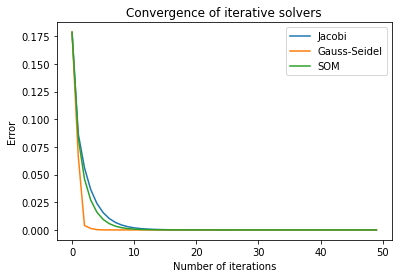

In [8]:
import matplotlib.pyplot as plt

K = [i for i in range(50)]
jacobi_error = []
Gauss_error = []
SOM_error = []
for k in K:
    j = jacobi(A, b, k)
    G = Gauss_Seidel(A, b, k)
    S = SOM(A, b, k, 0.5)
    T = np.linalg.solve(A, b)

    jacobi_error.append(np.linalg.norm(j - T))
    Gauss_error.append(np.linalg.norm(G - T))
    SOM_error.append(np.linalg.norm(S - T))

plt.figure()
plt.plot(K, jacobi_error, label='Jacobi')
plt.plot(K, Gauss_error, label='Gauss-Seidel')
plt.plot(K, SOM_error, label='SOM')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Convergence of iterative solvers')
plt.legend()
plt.show()

In [13]:
### Pr. 4b)

x = SOM(A, b, 100, 4)
x1 = SOM(A, b, 45, 3)
print(np.linalg.solve(A, b))
print(x)
print(x1)

'''
We can see that for $\omega$ values greater than 2 we get divergence
'''

[-0.00461723  0.12814403  0.058855    0.10965899]
[ 8.70595890e+54 -9.74522311e+54 -4.22463413e+54  2.33699598e+55]
[-4.44513234e+13  4.17206527e+14 -3.66556054e+14  4.60700372e+14]


'\nWe can see that for $\\omega$ values greater than 2 we get divergence\n'

In [14]:
import time
def Iterative_Race(n):
    B = np.random.rand(n, n)
    B = 0.5 * (B + B.T)
    B = B + n * np.eye(n)
    c = np.random.rand(n)

    funcs = [jacobi, Gauss_Seidel, SOM, np.linalg.solve]
    args = [(B, c, 45), (B,c, 15), (B, c, 45, 0.5), (B, c)]
    results = {}

    for func, arg in zip(funcs, args):
        start_time = time.time()
        func(*arg)
        elapsed_time = time.time() - start_time
        results[func.__name__] = elapsed_time

    for name, elapsed_time in results.items():
        print(f"{name} took {elapsed_time:.6f} seconds")

    return None
Iterative_Race(5000)

jacobi took 175.000836 seconds
Gauss_Seidel took 17.581800 seconds
SOM took 14.168801 seconds
solve took 1.254335 seconds
